In [6]:
#tensorいじりのテストを行う
import torch
import torch.nn
x = torch.randn(10,10,10)

In [7]:
def UpSampling1D(input):
    repeats = [1 for _ in range(len(input.shape))]
    repeats[1] = 2
    return input.repeat(*repeats)

In [8]:
UpSampling1D(x).shape

torch.Size([10, 20, 10])

In [9]:
from audio_to_multiple_pose_gan.dataset import load_train, generate_batch, get_processor
from audio_to_multiple_pose_gan.config import get_config

2023-10-17 17:18:04.595125: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-17 17:18:04.596753: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 17:18:04.618453: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 17:18:04.618484: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 17:18:04.618501: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [10]:
!ls

README.md		    common	      requirments.txt
audio_to_multiple_pose_gan  data	      speech2gesture
cmd.txt			    requirements.txt  tensortest.ipynb


In [11]:
import pandas as pd
from common.consts import AUDIO_SHAPE
batch_size = 32
train_csv: str = "~/Desktop/AI-Experiments/Gestures/train.csv"
#df = pd.read_csv(self.args.train_csv)
#cfg = get_config(self.args.config)
df = pd.read_csv(train_csv)
#cfg = get_config(config)
cfg: dict = {"processor": "audio_to_pose", "input_shape": [None, AUDIO_SHAPE]}
process_row, decode_pose = get_processor(cfg)
train_generator, num_samples_train = load_train(process_row, batch_size, df, generate_batch, workers=8 ,max_queue_size=32)

In [12]:
from common.consts import AUDIO_SHAPE
configs = {
    "audio_to_pose": {"num_keypoints": 98, "processor": "audio_to_pose", "flatten": False, "input_shape": [None, AUDIO_SHAPE]},
    "audio_to_pose_inference": {"num_keypoints": 98, "processor": "audio_to_pose_inference", "flatten": False, "input_shape": [None, AUDIO_SHAPE]}
}
cfg: dict = {"processor": "audio_to_pose", "input_shape": [None, AUDIO_SHAPE]}
process_row, decode_pose = get_processor(cfg)

In [13]:
row = df.sample(n=1).iloc[0]

In [14]:
process_row(row)

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([[0.        , 1.3343372 , 0.97361917, ..., 0.54656634, 0.66888031,
         0.72891161],
        [0.        , 1.3343372 , 1.02890075, ..., 0.53041151, 0.62141394,
         0.60443368],
        [0.        , 1.3343372 , 1.02890075, ..., 0.54656634, 0.71634669,
         0.69779213],
        ...,
        [0.        , 0.99937116, 0.80777444, ..., 0.38501805, 0.36825995,
         0.55775446],
        [0.        , 1.3343372 , 0.86305601, ..., 0.36886322, 0.65305819,
         0.63555316],
        [0.        , 1.3343372 , 0.69721128, ..., 0.91812741, 0.87456793,
         0.83782979]]))

In [15]:
X, Y = generate_batch(df, process_row, batch_size)

In [16]:
X.shape

(32, 67267)

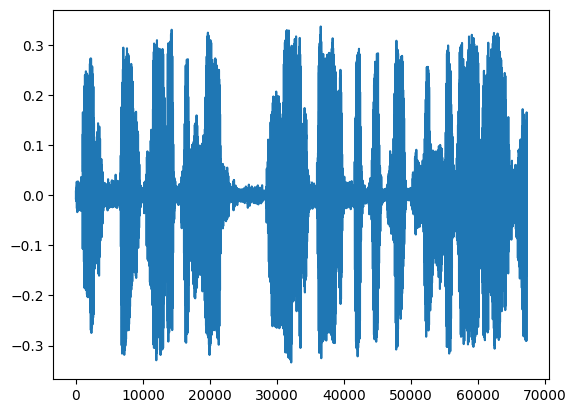

In [19]:
import matplotlib.pyplot as plt
plt.plot(X[0])
plt.show()

In [20]:
X

array([[ 0.00720311,  0.00337859,  0.00044018, ..., -0.14350942,
        -0.15190938, -0.15943381],
       [ 0.00666435,  0.006397  ,  0.00506765, ..., -0.00036755,
        -0.00028388, -0.00026738],
       [-0.13219145, -0.13803767, -0.14654598, ..., -0.00659886,
        -0.00527737, -0.00435241],
       ...,
       [-0.00850831, -0.00792165, -0.00813255, ..., -0.0027716 ,
        -0.00235408, -0.00204493],
       [ 0.03801936,  0.04189539,  0.04844862, ..., -0.00642193,
        -0.00577461, -0.00600735],
       [ 0.00247608,  0.00258865,  0.00215992, ...,  0.02363978,
         0.02654152,  0.03548853]], dtype=float32)

In [145]:
X.shape

(32, 67267)

In [21]:
import tensorflow as tf
import numpy as np

noise = np.random.rand(32,28,28,3)
tf.image.resize(noise, (64,1), method = tf.image.ResizeMethod.BILINEAR)

2023-10-17 17:19:16.463674: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-17 17:19:16.464727: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


<tf.Tensor: shape=(32, 64, 1, 3), dtype=float32, numpy=
array([[[[0.18551928, 0.4884659 , 0.89902973]],

        [[0.22047102, 0.4907194 , 0.78779775]],

        [[0.3183359 , 0.4970292 , 0.4763482 ]],

        ...,

        [[0.4103999 , 0.34626812, 0.7491024 ]],

        [[0.59468997, 0.42685658, 0.741889  ]],

        [[0.6605078 , 0.45563817, 0.73931277]]],


       [[[0.20520805, 0.43555844, 0.56485736]],

        [[0.22025362, 0.4447296 , 0.5291838 ]],

        [[0.2623812 , 0.47040883, 0.42929775]],

        ...,

        [[0.37908548, 0.8776263 , 0.30896452]],

        [[0.5297905 , 0.90128344, 0.44761425]],

        [[0.58361375, 0.90973246, 0.497132  ]]],


       [[[0.5474897 , 0.66156626, 0.5596739 ]],

        [[0.5478985 , 0.63382375, 0.5457147 ]],

        [[0.54904294, 0.55614465, 0.5066288 ]],

        ...,

        [[0.45677784, 0.42228633, 0.6088985 ]],

        [[0.43707561, 0.5970459 , 0.6208307 ]],

        [[0.4300391 , 0.65946007, 0.6250922 ]]],


       ...,




In [25]:
from torchvision import transforms
from torchvision.transforms import InterpolationMode
resize = transforms.Resize((64,1), InterpolationMode.BILINEAR, antialias=True)

In [26]:
x = torch.randn(32,3,28,28)
resize(x).shape

torch.Size([32, 3, 64, 1])